<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Moduli, numpy, matplotlib</b></font>
<br><br>
<font size="4">
[izr. prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>
<font size="2">Oktober 2017</font>
</center>

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Moduli-(nadaljevanje)" data-toc-modified-id="Moduli-(nadaljevanje)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Moduli (nadaljevanje)</a></div><div class="lev2 toc-item"><a href="#Upravljalnik-paketov-conda" data-toc-modified-id="Upravljalnik-paketov-conda-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Upravljalnik paketov <code>conda</code></a></div><div class="lev2 toc-item"><a href="#Upravljalnik-paketov-pip" data-toc-modified-id="Upravljalnik-paketov-pip-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Upravljalnik paketov <code>pip</code></a></div><div class="lev1 toc-item"><a href="#Modul-numpy" data-toc-modified-id="Modul-numpy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modul <code>numpy</code></a></div><div class="lev2 toc-item"><a href="#Nekatere-osnovne-funkcije" data-toc-modified-id="Nekatere-osnovne-funkcije-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Nekatere osnovne funkcije</a></div><div class="lev2 toc-item"><a href="#Rezanje" data-toc-modified-id="Rezanje-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Rezanje</a></div><div class="lev2 toc-item"><a href="#Nekaj-matričnega-računanja:" data-toc-modified-id="Nekaj-matričnega-računanja:-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Nekaj matričnega računanja:</a></div><div class="lev2 toc-item"><a href="#Linearna-algebra-z-numpy" data-toc-modified-id="Linearna-algebra-z-numpy-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Linearna algebra z <code>numpy</code></a></div><div class="lev2 toc-item"><a href="#Vektorizacija-algoritmov" data-toc-modified-id="Vektorizacija-algoritmov-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Vektorizacija algoritmov</a></div><div class="lev1 toc-item"><a href="#Modul-matplotlib" data-toc-modified-id="Modul-matplotlib-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modul <code>matplotlib</code></a></div><div class="lev2 toc-item"><a href="#Interaktivno-(2.)" data-toc-modified-id="Interaktivno-(2.)-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Interaktivno (2.)</a></div><div class="lev2 toc-item"><a href="#Osnovna-uporaba" data-toc-modified-id="Osnovna-uporaba-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Osnovna uporaba</a></div><div class="lev2 toc-item"><a href="#Več-slik" data-toc-modified-id="Več-slik-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Več slik</a></div><div class="lev2 toc-item"><a href="#Histogram" data-toc-modified-id="Histogram-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Histogram</a></div><div class="lev2 toc-item"><a href="#Uporaba-primerov-iz-matplotlib.org" data-toc-modified-id="Uporaba-primerov-iz-matplotlib.org-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Uporaba primerov iz <code>matplotlib.org</code></a></div><div class="lev1 toc-item"><a href="#Nekaj-vprašanj-za-razmislek!" data-toc-modified-id="Nekaj-vprašanj-za-razmislek!-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></div><div class="lev1 toc-item"><a href="#Dodatno" data-toc-modified-id="Dodatno-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dodatno</a></div><div class="lev2 toc-item"><a href="#Interaktivno-spreminjanje-in-animacija" data-toc-modified-id="Interaktivno-spreminjanje-in-animacija-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Interaktivno spreminjanje in animacija</a></div><div class="lev2 toc-item"><a href="#Primer-spreminjanja-barve-s-klikom." data-toc-modified-id="Primer-spreminjanja-barve-s-klikom.-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Primer spreminjanja barve s klikom.</a></div><div class="lev2 toc-item"><a href="#Za-najbolj-zagrete" data-toc-modified-id="Za-najbolj-zagrete-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Za najbolj zagrete</a></div>

# Moduli (nadaljevanje)

Poleg vgrajenih modulov, in tistih, ki jih pripravimo sami, pa obstaja še velika množica modulov, ki jih lahko najdemo na spletu in Pythonu dodajajo nove funkcionalnosti. Šele ti moduli naredijo ekosistem Pythona tako uporaben.

[Anaconda](https://www.anaconda.com/download/) je najbolj popularna distribucija Pythona in ima vključenih že veliko modulov (za podroben seznam glejte to [povezavo](https://docs.anaconda.com/anaconda/packages/pkg-docs)); predvsem pa ima vključene vse bistvene. Najbolj pomembne na področju inženirskih ved bomo spoznali v okviru te knjige.

Modul je tehnično gledano ena datoteka, kadar nek večji modul vsebuje več modulov, pa lahko začnemo govoriti o *paketih*. 
Module oz pakete lahko *posodabljamo* ali nameščamo *nove*, pri tem nam pomagajo t.i. *upravljalniki paketov* (ang. *package manager*). Najbolj pogosto uporabljamo:
* `pip`: [dokumentacija](https://pip.pypa.io/en/stable/),
* `conda`: [dokumentacija](https://conda.io/docs/).

Upravljalnika paketov nista povsem ekvivalentna, pogosto uporabo si bomo pogledali spodaj.

## Upravljalnik paketov `conda`
`conda` uporabljamo predvsem za module / pakete vključene v distribucijo *Anaconda* in ima še nekatere dodatne sposobnosti (npr. kreiranja navideznega okolja, ang. *virtual environment*).

Če želimo posodobiti vse nameščene pakete znotraj distribucije Anaconda, najprej posodobimo samo `conda`, nato pa pakete. V ukazni vrstici izvedemo sledeča ukaza:
```
conda update conda
conda update --all
```

Kateri paketi so nameščeni preverimo z ukazom (v ukazni vrstici):
```
conda list
```

Namesto izhoda v ukazno vrstico, bomo tukaj večkrat uporabljali možnost *Jupyter notebooka*, da s pomočjo klicaja (!) v celici s kodo izvedemo ukaz v ukazni vrstici. Če izvedemo ukaz z dvema klicajema (!!, gre za kratko obliko magičnega ukaza `%se` - shell execute, glejte [dokumentacijo](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-sx)), pa se ukaz izvede in v notebook vrne rezultat.

Poglejmo slednje:

In [1]:
!!conda list

['# packages in environment at c:\\Users\\Janko\\Anaconda3:',
 '#',
 '_ipyw_jlab_nb_ext_conf    0.1.0            py36he6757f0_0  ',
 'alabaster                 0.7.10           py36hcd07829_0  ',
 'anaconda                  5.0.0            py36hea9b2fc_0  ',
 'anaconda-client           1.6.5            py36hd36550c_0  ',
 'anaconda-navigator        1.6.8            py36h4b7dd57_0  ',
 'anaconda-project          0.8.0            py36h8b3bf89_0  ',
 'asn1crypto                0.22.0           py36h8e79faa_1  ',
 'astroid                   1.5.3            py36h9d85297_0  ',
 'astropy                   2.0.2            py36h06391c4_4  ',
 'babel                     2.5.0            py36h35444c1_0  ',
 'backports                 1.0              py36h81696a8_1  ',
 'backports.shutil_get_terminal_size 1.0.0            py36h79ab834_2  ',
 'beautifulsoup4            4.6.0            py36hd4cc5e8_1  ',
 'bitarray                  0.8.1            py36h6af124b_0  ',
 'bkcharts                 

Pakete namestimo z ukazom (v ukazni vrstici):
```
conda install [ime paketa]
```
in odstranimo z:
```
conda remove [ime paketa]
```
Za več glejte [dokumentacijo](https://conda.io/docs/user-guide/getting-started.html).

## Upravljalnik paketov `pip`

`pip` je upravljalnik paketov z daljšo zgodovino kot `conda`; podpira bistveno več paketov ([pypi.python.org/pypi](https://pypi.python.org/pypi)), vendar ni tako odporen na nezdružljivosti kakor `conda`. Razlik je še več, vendar tukaj ne bomo šli v podrobnosti; uporabljate tistega, ki vam namesti željeni paket!

Podobno kot pri `conda`, tudi tukaj že nameščene pakete najdemo z ukazom v ukazni vrstici ([dokumentacija](https://pip.pypa.io/en/stable/reference/pip_list/)):
```
pip list
```

Pakete s `pip` namestimo z:
```
pip install [ime_paketa]
```
posodobimo z:
```
pip install [ime_paketa] --upgrade
```
in odstranimo z:
```
pip uninstall [ime_paketa]
```

### Primer namestitve paketa

Sicer pa pakete najpogosteje najdemo na spletu ([pypi.python.org](https://pypi.python.org/pypi)). Pojdite na omenjeni portal in poišite pakete na temo snemanja posnetkov iz portala [www.youtube.com](https://www.youtube.com).  Z iskanjem "youtube download" najdemo obetaven paket `youtube_dl`, ki ga namestimo:

In [2]:
!!pip install "youtube_dl" --upgrade

['Collecting youtube_dl',
 '  Downloading youtube_dl-2017.10.7-py2.py3-none-any.whl (1.6MB)',
 'Installing collected packages: youtube-dl',
 'Successfully installed youtube-dl-2017.10.7']

Sedaj modul uporabimo (za podrobnosi uporabe glejte [dokumentacijo](http://rg3.github.io/youtube-dl/)). Najprej uvozimo celotni paket:

In [5]:
import youtube_dl
yt = youtube_dl.YoutubeDL() # kreiramo instanco objekta (kaj to točno pomeni, spoznamo pozneje)

In prenesemo poljubni video:

In [7]:
yt.download(url_list = ['7VGiJN-sCKk'])

[youtube] 7VGiJN-sCKk: Downloading webpage
[youtube] 7VGiJN-sCKk: Downloading video info webpage
[youtube] 7VGiJN-sCKk: Extracting video information
[youtube] 7VGiJN-sCKk: Downloading MPD manifest
[download] Destination: HOZENTREGARJI- JUTR TOČIMO ZASTONJ-7VGiJN-sCKk.mp4
[download] 100% of 8.14MiB in 00:05                  


0

# Modul ``numpy``

Kakor je omenjeno zgoraj, so v okviru *Anaconda* distribucije Pythona že nameščeni praktično vsi pomembni moduli. V kolikor bi namestili Python *the hard way*, bi sicer morali modul ``numpy`` namestiti posebej (glejte [spletno stran `numpy`](http://www.numpy.org)).

## Nekatere osnovne funkcije

Najprej uvozimo modul (uveljavljeno je, da ga uvozimo v kratki obliki `np`):

In [8]:
import numpy as np

Gre za enega najbolj pomembnih modulov. Na kratko: gre za visoko optimiran modul za numerične izračune!

Poglejmo si najprej sintakso za vektor ničel ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)):
```python
numpy.zeros(shape, dtype=float, order='C')
```
argumenti so:
* `shape` definira obliko (lahko večdimenzijsko numerično polje),
* `dtype` definira tip podatka,
* `order` definira vrstni red (lahko je C ali F kot Fortran).

Poglejmo primer:

In [17]:
np.zeros(3)

array([ 0.,  0.,  0.])

Ali pa:

In [18]:
np.zeros((3,5))

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

Podobno koz `zeros` se obnaša `ones`, vendar je namesto ničel vrednost 1 ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html#numpy.ones)). 

Poglejmo si primer, kjer definiramo tip `int`:

In [19]:
np.ones(4, dtype=int)

array([1, 1, 1, 1])

Pogosto bomo tudi uporabljali razpon vrednosti `arange`([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)):
```python
numpy.arange([start, ]stop, [step, ]dtype=None)
```
kjer so argumenti:
* `start` začetna vrednost razpona (privzeto 0),
* `stop` končna vrednost razpona,
* `step` korak in 
* `dtype` tip vrednosti.

Pogljemo primer razpona od 0 do 9 (kakor vedno pri Pythonu *od* je vključen, *do* pa ni):

In [20]:
np.arange(3)

array([0, 1, 2])

Ali pa od 7 do 12 po koraku 2, vendar število s plavajočo vejico:

In [22]:
np.arange(7, 12, 2, dtype=float)

array([  7.,   9.,  11.])

Do posameznega elementa dostopamo kakor sicer pri navadnih Python seznamih:

In [25]:
a = np.arange(3)
a

array([0, 1, 2])

Element z indeksom 0:

In [26]:
a[0]

0

In zadnji:

In [24]:
a[-1]

2

## Rezanje

Poglejmo si sedaj **rezanje** (*slicing*) numeričnega polja.

Na dolgo: glejte [spletno dokumentacijo](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

Na kratko (**od pomeni >= **  in **do pomeni <**):

* ``b[od:do:korak]``: elementi **od** **do** po **korak**-ih
* ``b[od:do]``: elementi **od** **do**
* ``b[od:]``: elementi **od** naprej
* ``b[:do]``: vsi **do** elementi
* ``b[:]``: vsi elementi

Če želimo na primer prve tri elemente (torej elemente od 0 do 3: 0, 1, 2), to naredimo takole:

In [14]:
b[:3]

array([0, 1, 2])

Poglejmo nekatere primere:

In [15]:
b[0:3:2] # beremo: od 0 do 3 vsak drugi element

array([0, 2])

In [16]:
b[::2] # beremo: od začetka do konca podaj vsak drugi element

array([0, 2, 4, 6, 8])

In [17]:
b[1:-1] #beremo: od 1 do 1 element manj kot vsi

array([1, 2, 3, 4, 5, 6, 7])

In [18]:
b[-2:] # beremo: od 2 dva elementa manj kot vsi do konca

array([7, 8])

In [19]:
b[::-1] # beremo: od začetka do konca z negativnim korakom (to je lahko samo od konca proti začetku)

array([8, 7, 6, 5, 4, 3, 2, 1, 0])

Opomba: o razlogih, da se indeksiranje začne z 0 in ne 1, obstajajo obsežne razlage. 

Glejte tukaj, kako različna programska okolja začnejo indeksiranje:
http://en.wikipedia.org/wiki/Array_slicing

Eden od zelo dobrih argumentov za polodprti interval (od a do b) je: število elementov = b - a. Če se indeksi začnejo z 1 in je potem indeksiranje od a do vključno b, potem je število elementov = b - a + 1.

Tu ne bomo šli v podrobnosti; enostavno se boste naučili in potem se boste spraševali, zakaj bi sploh delali drugače.

### Zapis matrik in vektorjev

Matrika je dimenzije ``m x n``, kjer je na prvem mestu ``m`` število vrstic in ``n`` število stolpcev:

In [20]:
a = np.zeros((3, 2))
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

Vektor je lahko zapisan kot **vrstični vektor**:

In [21]:
b = np.zeros(3) # (1 x 3)
b

array([ 0.,  0.,  0.])

ali kot **stolpični vektor**:

In [22]:
c = np.zeros((3, 1)) # 3 x 1
c

array([[ 0.],
       [ 0.],
       [ 0.]])

**Opomba**: v modulu ``numpy`` lahko vektorje in matrike zapisujete kot:
* večdimenzijske *sezname* oz. večdimenzijsko *numerično polje* (*array*) ali kot
* *matrike* (*matrix*). 

Pri tem predmetu bomo vedno uporabljali priporočeno obliko seznamov, zato v detajle uporabe tipa *matrix* ne bomo šli. Kakšne so prednosti priporočenega načina (predvsem numerična učinkovitost in enostavnost programiranja), si lahko pogledate [tukaj](http://wiki.scipy.org/NumPy_for_Matlab_Users#head-e9a492daa18afcd86e84e07cd2824a9b1b651935).

### Dostopanje in spreminjanje elementov numeričnega polja (array)

Najprej ustvarimo dvodimenzionalno polje ničel:

In [23]:
a = np.zeros((2, 3)) # na prvem mestu je vedno število vrstic, na drugem stolpcev
a

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [24]:
np.ndim(a) # matrike so dvodimenzionalne, vektorji pa enodimenzionalni; število dimenzij je načelno poljubno

2

In [25]:
a[0] = [1., 2., 3] # element z indeksom 0 (vrstica 0)
a

array([[ 1.,  2.,  3.],
       [ 0.,  0.,  0.]])

In [26]:
a[1,1] = 4 # vrstica 1, stolpec 1
a

array([[ 1.,  2.,  3.],
       [ 0.,  4.,  0.]])

In [27]:
a[1, 1:3] = [5, 6] # vrstica 1, znotraj nje stolpci od 1 do 3
a

array([[ 1.,  2.,  3.],
       [ 0.,  5.,  6.]])

In [28]:
a[:, 2] # vse vrstice, znotraj njih stolpec 2

array([ 3.,  6.])

Bodite pozorni na to, da na tak način naredimo *pogled* (view) na podatke (**ne naredimo kopije podatkov!!**):

In [29]:
pogled = a[:, 2]
pogled

array([ 3.,  6.])

In [30]:
a[:, 2] = 0
print(a)
print('pogled:', pogled)

[[ 1.  2.  0.]
 [ 0.  5.  0.]]
pogled: [ 0.  0.]


Če želimo kopijo, potem moramo narediti tako:

In [31]:
kopija = a[:, 2].copy()
kopija

array([ 0.,  0.])

In [32]:
a[:, 2] = 2
print(a)
print('kopija:', kopija)

[[ 1.  2.  2.]
 [ 0.  5.  2.]]
kopija: [ 0.  0.]


### Operacije nad numeričnimi polji

In [33]:
a = [1, 2, 3, 4, 5, 6, 7]     # navaden seznam
b = np.asarray(a) # numpy numerično polje, numpy seznam

In [34]:
a

[1, 2, 3, 4, 5, 6, 7]

In [35]:
2*a # podvoji seznam!

[1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7]

In [36]:
b

array([1, 2, 3, 4, 5, 6, 7])

``numpy`` izvaja matematične operacije (``*, **, /, //, %``) na nivoju posameznega elementa:

In [37]:
2*b # pomnožijo se posamezni elementi

array([ 2,  4,  6,  8, 10, 12, 14])

Ali tudi:

In [38]:
np.sin(a) # numpy operacijo lahko kličemo za navaden seznam

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ,  0.6569866 ])

Vendar poglejmo hitrost izvajanja. Uprabimo ``%timeit`` magično funkcijo za merjenje hitrosti izvajanja:

In [39]:
%timeit np.sin(a)

The slowest run took 8.63 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.56 µs per loop


PS: Jupyter ima veliko število tako imenovanih *magic* ukazov. Dober pregled je tukaj: [blog.dominodatalab.com](http://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/?utm_source=pulsenews&utm_medium=referral).

Poglejmo sedaj numpyjevo funkcijo nad numpyjevim numeričnim poljem:

In [40]:
np.sin(b) # numpy operacijo kličemo za numerično polje 

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ,  0.6569866 ])

In [41]:
%timeit np.sin(b)

The slowest run took 17.77 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.61 µs per loop


Ugotovimo, da je slednje bistveno hitreje!

### Podatkovni tipi

``numpy`` ima vnaprej definirane podatkovne tipe (statično). Celoten seznam možnih tipov je naveden v [dokumentaciji](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

Tukaj se bomo osredotočili predvsem na sledeče tipe:
* ``int`` - celo število (poljubno veliko)
* ``float`` - število s plavajočo vejico ([dokumentacija](https://docs.python.org/dev/library/functions.html#float))
* ``complex`` - kompleksno število s plavajočo vejico
* ``object`` - python objekt.

Poglejmo si nekaj primerov:

In [42]:
np.arange(5, dtype=int)

array([0, 1, 2, 3, 4])

In [43]:
np.arange(5, dtype=float)

array([ 0.,  1.,  2.,  3.,  4.])

In [44]:
np.arange(5, dtype=complex)

array([ 0.+0.j,  1.+0.j,  2.+0.j,  3.+0.j,  4.+0.j])

### Nekatere funkcije knjižnice ``numpy``

In [45]:
A = np.identity(3)

In [46]:
A

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [47]:
np.diagonal(A)

array([ 1.,  1.,  1.])

In [48]:
np.trace(A)

3.0

In [49]:
A[0, 1] = 5
A

array([[ 1.,  5.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [50]:
np.max(A, axis = 0) # axis pomeni čez kateri indeks se išče določeno vrednost, 0 beremo: čez vrstice

array([ 1.,  5.,  1.])

In [51]:
np.argmax(A, axis = 0) # indeks, ki pripada max vrednosti

array([0, 0, 2], dtype=int64)

## Nekaj matričnega računanja:

Če želite ponoviti osnove matričnega računanja, potem sledite tej povezavi (priporočam! gre za kratek in dober pregled): [www.fmf.uni-lj.si](http://www.fmf.uni-lj.si/~kosir/poucevanje/skripta/matrike.pdf).

In [52]:
A = np.array([[1, 2], [3, 2]])
B = np.array([[1, 1], [2, 2]])
x = np.array([1, 2])
y = np.array([3, 4])

Skalarni produkt dveh vektorjev:

In [53]:
np.dot(x, y) # pomembno: ker so vektorji zapisani kot seznami, ni potrebno transponiranje!

11

Ali tudi tako:

In [54]:
x.dot(y)

11

Matrike z vektorjem:

In [55]:
np.dot(A, x) # ponovno: ker uporabljamo sezname, transponiranje ni potrebno

array([5, 7])

Ali tudi tako (tako bi bilo sicer matematično pravilno):

In [56]:
A.dot(np.transpose([x]))

array([[5],
       [7]])

Množenje dveh matrik:

In [57]:
np.dot(A, B)

array([[5, 5],
       [7, 7]])

Vektorski produkt dveh vektorjev:

In [58]:
np.cross(x, y)

array(-2)

## Linearna algebra z ``numpy``

In [59]:
A = np.array([[4, -2],
              [-2, 4]])
b = np.array([1, 2])

In [60]:
np.linalg.inv(A)

array([[ 0.33333333,  0.16666667],
       [ 0.16666667,  0.33333333]])

In [61]:
a = np.linalg.solve(A, b)
a

array([ 0.66666667,  0.83333333])

In [62]:
np.isclose(np.dot(A, a), b)

array([ True,  True], dtype=bool)

## Vektorizacija algoritmov

Za hitro izvajanje kode je zelo pomembno, da operacije poskušamo zapisati vektorsko!

Primer klasične zanke (počasi):

In [63]:
N = 1000
a = np.arange(N)
b = np.arange(N)

In [64]:
#%%timeit #pazi: dva % pomeni, da se magic funkcija nanaša na celotni bloka
c = 0
for i in range(N):
    c += a[i] * b[i]

In [65]:
c

332833500

Sedaj pa vektorsko (hitro):

In [66]:
#%%timeit
c = np.dot(a, b)

In [67]:
c

332833500

# Modul ``matplotlib``

In [8]:
import matplotlib.pyplot as plt # tipično uvozimo pyplot kot plt

``matplotlib`` je modul namenjen izrisu slik, glejte [matplotlib.org](http://matplotlib.org/)

<img src="http://matplotlib.org/_static/logo_sidebar_horiz.png">

Galerija je tukaj:
[matplotlib.org/gallery.html](http://matplotlib.org/gallery.html#).

Znotraj IPythona obstajata dva načina prikaza slike:
1. t. i. *inline* način: slike so vstavljene v ta dokument
2. t. i. *interaktivni* način: slike se prikažejo v ločenem oknu.

Inline način aktiviramo z *magic* ukazom:

In [6]:
%matplotlib inline
#%matplotlib notebook

Kratek primer:

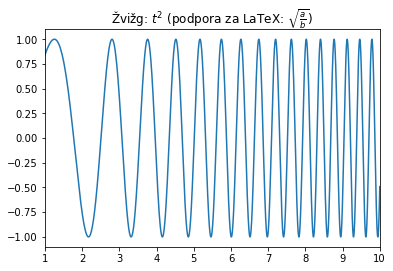

In [7]:
t = np.linspace(1, 130, 44000)
zvizg=np.sin(t**2)
#plt.figure(figsize=(20,6))
plt.plot(t, zvizg)
plt.xlim(1, 10)
plt.title('Žvižg: $t^2$ (podpora za LaTeX: $\\sqrt{\\frac{a}{b}}$)');

Zakaj žvižg?

In [9]:
from IPython.display import Audio, display
display(Audio(data=zvizg, rate=44000))

Aktivirajmo sedaj interaktivni način (glejte tudi ``%matplotlib?``):

In [34]:
#%matplotlib inline
%matplotlib notebook

In [35]:
plt.plot([1,2,3], [2,4,5]);

In [36]:
plt.title('Žvižg: $t^2$ (podpora za LaTeX: $\\sqrt{\\frac{a}{b}}$)');
plt.xlabel('Čas [$t$]')

## Interaktivno (2.)

In [37]:
from ipywidgets import interact

In [38]:
def slika(amplituda=1, fr=10, faza=0, dušenje=0.):
    t = np.linspace(0, 1, 200)
    f = amplituda * np.sin(2*np.pi*fr*t - faza) * np.exp(-dušenje*2*np.pi*fr*t)
    plt.plot(t, f)
    plt.ylim(-5, 5)

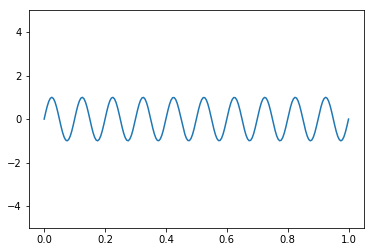

In [39]:
%matplotlib inline
slika()

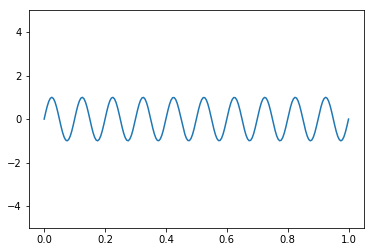

In [40]:
interact(slika);

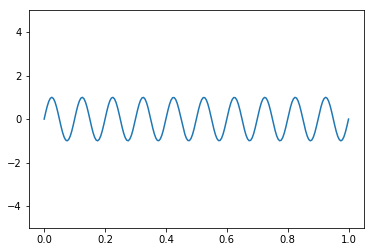

In [41]:
interact(slika, amplituda=[1, 5, 1], dušenje=[0, 1, 0.05], fr=[10, 100, 1], faza=[0, 2*np.pi, np.pi/180]);

## Osnovna uporaba

Poglejmo si preprost primer prikaza več funkcij:

In [ ]:
%matplotlib inline

In [ ]:
x = np.linspace(0, 10, 100)

y1 = np.sin(x)
y2 = np.sin(x+1)
y3 = np.sin(x**1.2)

plt.plot(x, y1, 'g-', label='$\sin(x)$ - to je LaTeX izpis', linewidth = 2); # glejte help za parametre (barve, tip črte,...)
plt.plot(x, y2, 'b.', label='sin(x+1) - to ni', linewidth = 2);
plt.plot(x, y3, 'r--', label='$\sin(x^{1.2})$ - to spet je: čšž', linewidth = 2);
plt.legend(loc=(1.01,0)); # glejte help za postavitev legende
plt.savefig('data/prvi plot.pdf')

## Več slik

In [ ]:
plt.subplot(2, 2, 1)
plt.plot(x, y1, 'r')
plt.subplot(2, 2, 2)
plt.plot(x, y2, 'g')
plt.subplot(2, 2, 3)
plt.plot(x, y2*y3, 'b')
plt.subplot(2, 2, 4)
plt.plot(x, y2+y3, 'k', linewidth=5);
plt.grid()

## Histogram

In [ ]:
x = np.random.normal(size=10000)
plt.hist(x);

## Uporaba primerov iz ``matplotlib.org``

Poglejmo sedaj en zgled iz [uradne strani](http://matplotlib.org/gallery.html).

In [ ]:
%load http://matplotlib.org/mpl_examples/lines_bars_and_markers/fill_demo.py

Poglejmo še primer z drsniki in gumbi (moramo preklopiti na interaktivni način):

In [ ]:
%load http://matplotlib.org/examples/widgets/slider_demo.py

Spodaj v razdelku *Dodatno* lahko najdete bolj podroben primer.

En primer malo za zabavo. Z ``matplotlib`` lahko relativno enostavno rišemo v **xkcd** stilu (http://xkcd.com/): 

In [ ]:
plt.xkcd()  # Yes...
plt.plot(np.sin(np.linspace(0, 10)), 'r', label='Rdeči val:)')
plt.plot(np.sin(np.linspace(0, 10)-1), 'b', label='Modri val:)')
plt.title('Hopa, a bo modri ujel rdečega?')
plt.legend();

In [ ]:
# %load http://matplotlib.org/mpl_examples/showcase/xkcd.py

# Nekaj vprašanj za razmislek!

1. Naredite slovar lokalno nameščenih modulov (uporabite izpeljevanje slovarjev, ključ naj bo ime modula, vrednost naj bo verzija).
2. S pomočjo slovarja iz prejšnje točke čimbolj elegantno preverite ali so nameščeni sledeči moduli: ['numpy', 'scipy', 'matplotlib', 'pandas', 'pyjamas', 'openpyxl'].
3. Namestite poljubni modul iz https://pypi.python.org/pypi in ga preizkusite.
4. Pretvorite *navaden* Python seznam v ``numpy`` seznam. Preverite tip enega in drugega.
5. Raziščite funkcije ``np.ones``, ``np.zeros_like``, ``np.arange``, ``np.linspace`` (ali zadnja funkcija lahko vrne korak?).
6. Prikažite uporabo rezanja.
7. Prikažite razliko med vrstičnim in stolpičnim vektorjem. Prikažite tipične matematične operacije med vektorji in matrikami.
8. Ustvarite matriko ničel dimenzije 3 x 2 in drugi stolpec zapolnite z vektorjem enic.
9. Ustvarite enotsko matriko dimenzije 5 podatkovnega tipa ``complex``.
10. Ustvarite enotsko matriko dimenzije ``N`` in izračunajte vsoto poljubnga stolpca. Poskusite najti najhitrejši in najelegantnejši (vektoriziran) način in ga primerjajte s pristopom v zanki. Namig: np.sum().
11. V matriki iz prejšnje točke zamenjajte poljubna stolpca, nato še poljubni vrstici. Preverite hitrost vaše implementacije.
12. S pomočjo funkcije ``np.random.rand`` ustvarite dvorazsežno matriko poljubne dimenzije in najdite največjo in najmanjšo vrednost. Preverite možnost ``axis`` v funkciji ``np.max`` ali ``np.min``.
13. V matriki iz prejšnje točke najdite indeks, kjer se nahaja največja vrednost.
14. Na primeru preprostega diagrama prikažite razliko med *inline* in *interaktivno* uporabo knjižnice ``matplotlib``
15. Na primeru preprostega diagrama prikažite uporabo vsaj 5 različnih tipov črte in 5 različnih barv.
16. Raziščite primere http://matplotlib.org/gallery.html. Za primer si podrobneje poglejte enega od zgledov na temo zaznamb *annotation*. Izbrani primer namestite na vaš računalnik.
17. Na primeru preprostega diagrama prikažite uporabo zaznamb.
18. Dodatno: Naredite preprosto animacijo.
19. Dodatno: Izrišite več krogov naključne lege in velikosti ter poljubne barve. Ob kliku se krogom naj spremeni barva.

# Dodatno

## Interaktivno spreminjanje in animacija

In [ ]:
%matplotlib

Ustvarimo objekt slike in osi

In [ ]:
fig, ax = plt.subplots()

Sedaj se je odprlo interktivno okno. Narišimo nakej podatkov:

In [ ]:
ax.plot(np.random.rand(100))

Vidimo, da nam funkcija vrne terko z objektom ``Line2D``. Na sliki se nič ne zgodi, ker moramo objektu ``fig`` sporočiti, da naj posodobi sliko:

In [ ]:
fig.canvas.draw()

Narišimo še enkrat podatke, vendar tokrat ujamimo objekt ``Line2D`` v spremenljivko:

In [ ]:
line, = ax.plot(np.random.rand(100))
fig.canvas.draw()

Sedaj raziščimo, kaj lahko objektu spremenimo:

In [ ]:
line.set_linewidth(4)
line.set_color('r')
line.set_dashes((2,4))
line.set_marker('o')
fig.canvas.draw()

Sedaj lahko nadaljujemo, sliko animiramo:

In [ ]:
N = 100
a = 0.5 + 0.5*np.sin(np.linspace(0, 2*np.pi, N, endpoint=False))
for i in range(N):
    line.set_ydata(a)
    fig.canvas.draw()
    a = np.roll(a, 1)

To je bil prvi korak v smeri animacije. Če želimo animacijo tudi shraniti in jo narediti bolj urejeno, postopamo kot je prikazano [tukaj](http://nbviewer.ipython.org/github/jakevdp/matplotlib_pydata2013/blob/master/notebooks/05_Animations.ipynb).

## Primer spreminjanja barve s klikom.

Poglejmo si sedaj še preprost primer *call-back* funkcije:

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
for i in range(5):
    rect = plt.Rectangle((i, i), 1, 1, fc=np.random.random(3), picker=True)
    ax.add_patch(rect)

def ob_kliku(dogodek):
    artist = dogodek.artist
    artist.set_fc(np.random.random(3))
    fig.canvas.draw()
    
fig.canvas.mpl_connect('pick_event', ob_kliku)

Tukaj se sedaj lahko ustavimo neskončno dolgo časa in rišemo različne tipe prikaza. Če boste potrebovali določen tip prikaza, priporočam, da začnete z zgledom. 

Za tiste, ki vas zanima napredna uporaba (call-back funkcije, animacije,...), toplo priporočam ta [tutorial](http://nbviewer.ipython.org/github/jakevdp/matplotlib_pydata2013/tree/master/notebooks/).

Nekatere detajle ``matplotlib`` bomo spoznali na naslednjih predavanjih.

## Za najbolj zagrete

1. Naučite se kaj novega na [chrisalbon.com](http://chrisalbon.com/)